## Model setup XBeach 1D

Setup a 1D XBeach model with the Python toolbox

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from matplotlib import cm
import sys
import os

Import the toolbox and set the xbeach styleshoot for plotting

In [3]:
## import xbeach tools
sys.path.append(os.path.abspath(os.path.join('..','scripts' )))

from xbeachtools import xgrid, ygrid, seaward_extend, XBeachModelSetup
plt.style.use(os.path.join('..','scripts','xb.mplstyle'))

### Data
Load and plot the bathymetry data

Text(0.5, 1.0, 'bathy')

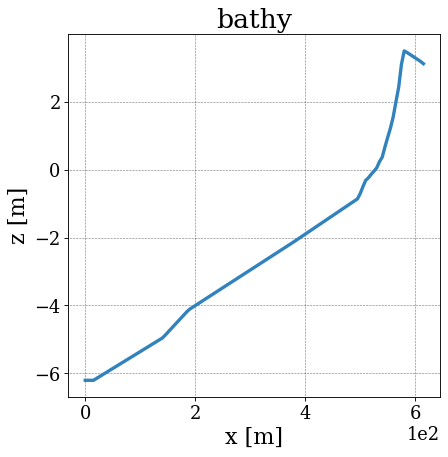

In [5]:
## load data
bathy = np.loadtxt('..//examples//clean//bathy.dep')
bathy = bathy[0,:]

## set bathy grid
nx = 124
ny = 72
dx = 5
dy = 20

x = np.linspace(0,(nx-1)*dx,nx)

## plot
plt.figure()
plt.plot(x,bathy)
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.title('bathy')

### Create x-grid
Create spatially varying x-grid resolution.

Text(0, 0.5, 'z [m]')

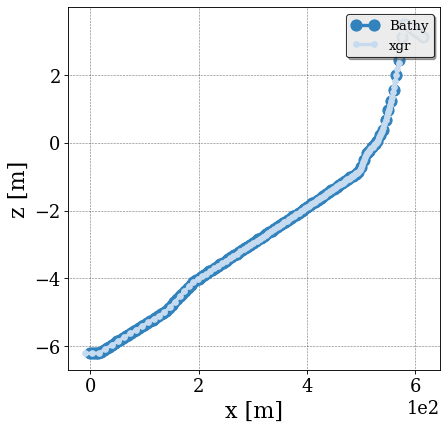

In [6]:
xgr,zgr = xgrid(x, bathy,dxmin=2)


plt.figure()
plt.plot(x,bathy,'-o')
plt.plot(xgr,zgr,'.-')
plt.legend(['Bathy','xgr'])
plt.xlabel('x [m]')
plt.ylabel('z [m]')

### Interpolate
Interpolate data to new grid

Text(0.5, 1.0, 'xb bathy')

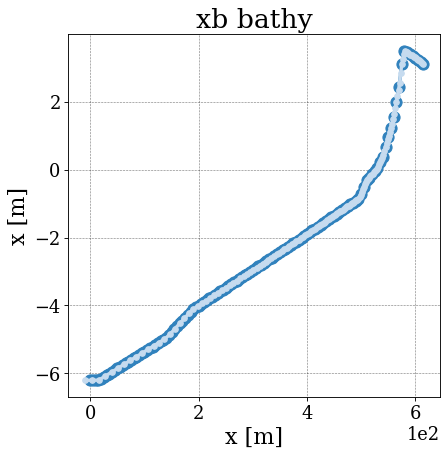

In [7]:
zgr = np.interp(xgr, x, bathy)

plt.figure()
plt.plot(x,bathy,'-o')
plt.plot(xgr,zgr,'.-')
plt.xlabel('x [m]')
plt.ylabel('x [m]')
plt.title('xb bathy')


### Seaward extend
Extend the grid to the required offshore depth. In this case 20 m with a artifial slope of 1/20.

Text(0, 0.5, 'z [m]')

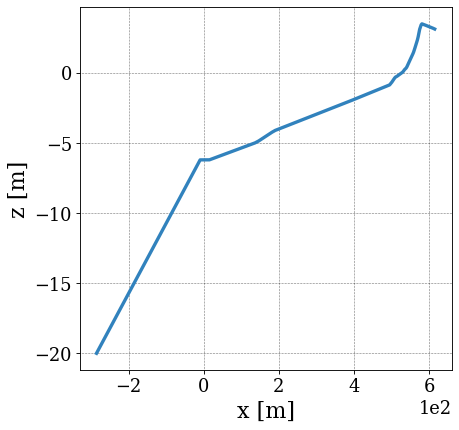

In [8]:
xgr, ygr, zgr = seaward_extend(xgr,[0],zgr,slope=1/20,depth=-20)



plt.figure()
plt.plot(xgr.T,zgr[:,:].T)
plt.xlabel('x [m]')
plt.ylabel('z [m]')


### Create model setup
Create the model setup class

In [9]:
xb_setup = XBeachModelSetup('Test som 2')

print(xb_setup)

Test som 2


Add the grid, wave boundary conditions and parameter to the model

In [10]:
xb_setup.set_grid(xgr,None,zgr)

xb_setup.set_waves('params',{'Hm0':2,'Tp':5,'gammajsp':3.3, 's' : 10000, 'mainang':270,'fnyq':1})
#xb_setup.set_waves('jonstable',{'Hm0':[1.5, 2, 1.5],'Tp':[4, 5, 4],'gammajsp':[3.3, 3.3, 3.3], 's' : [20,20,20], 'mainang':[270,280, 290],'duration':[3600, 3600, 3600],'dtbc':[1,1,1]})


xb_setup.set_params({'Wavemodel':'surfbeat',
                     'morphology':0,
                     'befriccoef':0.01,
                     'tstop':3600,
                     'nglobalvar':['zb','zs','H'],
                     'npointvar':['zs','zb'],
                     'nmeanvar':['zb'],
                     'npoints':['1 0', '6 0', '10 0', '12 0']})

Write the model setup

wbctype=jons cannot be plotted


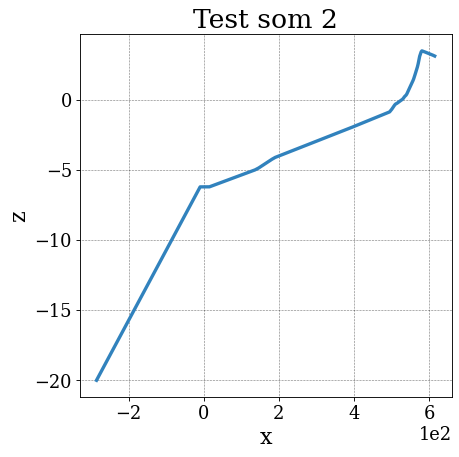

In [11]:
sim_path = os.path.join('xb-1D')
if not os.path.exists(sim_path):
    os.mkdir(sim_path)
xb_setup.write_model(sim_path)